# SCI1022 Python Assignment 2: Matrix-vector multiplication

In this assignment you have to develop code able to multiply a matrix by a vector. Matrix-vector multiplication is an absolutely fundamental operation, with countless applications in computer science and scientific computing. For example, matrix-vector multiplication lays at the core of [iterative methods](https://en.wikipedia.org/wiki/Iterative_method) for the solution of linear systems. Linear systems are ubiquitous in the numerical discretization of [Partial Differential Equations](https://en.wikipedia.org/wiki/Partial_differential_equation), as those governing the mechanics of [solids](https://en.wikipedia.org/wiki/Solid_mechanics) and [fluids](https://en.wikipedia.org/wiki/Fluid_mechanics). In all these applications, efficient algorithms for matrix-vector multiplication are of paramount importance.

For simplicity, we will work with square matrices, i.e., matrices which have the same number of rows and columns. Let $A \in  {\rm I\!R}^n \times {\rm I\!R}^n$ be a square matrix with $n$ rows and columns, and $x \in {\rm I\!R}^n$ a vector with $n$ entries. We will use the following index convention to refer to the $n \times n$ entries of $A$ and $n$ entries of $x$:

$$
A = \begin{pmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n-1} \\
a_{1,0} & a_{1,1} & \cdots & a_{1,n-1} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{n-1,0} & a_{n-1,1} & \cdots & a_{n-1,n-1} 
\end{pmatrix}
\quad \mathrm{and} \quad   x =
\begin{pmatrix}
           x_{0} \\
           x_{1} \\
           \vdots \\
           x_{n-1}
\end{pmatrix}.
$$

## Dot-product variant (a.k.a. row-variant) of matrix-vector multiplication

The multiplication of $A$ by $x$ is a vector $y \in {\rm I\!R}^n$ (i.e., with $n$ entries), where each entry $y_i$, with $i=0,\ldots,n-1$, is defined as $y_i=\sum_{j=0}^{n-1} a_{i,j} x_{j}$. In other words, the $i$-th entry of $y$ is defined as the [dot (a.k.a. Euclidean or inner)](https://en.wikipedia.org/wiki/Dot_product) product of the $i$-th row of $A$ and $x$. In the following expression, you may see how all the entries of $y$ are defined: 

$$
y = \begin{pmatrix}
           y_{0} \\
           y_{1} \\
           \vdots \\
           y_{n-1}
\end{pmatrix} 
=
\begin{pmatrix}
           \sum_{j=0}^{n-1} a_{0,j} x_{j} \\
           \sum_{j=0}^{n-1} a_{1,j} x_{j} \\
           \vdots \\
           \sum_{j=0}^{n-1} a_{n-1,j} x_{j}
\end{pmatrix} 
.
$$

We will refer to this way of looking at the operation as the **dot product variant of matrix-vector product**, as indeed the dot-product is the basic operation required to obtain each entry of $y$. The dot product variant is also referred as the *row-variant* of matrix-vector multiplication, as when one implements it in a computer, the matrix $A$ is accessed by rows (i.e., we first access the first row left-to-right, then we jump to the second row and access it left-to-right, and so on, till we access the last row).  

## AXPY-product variant (a.k.a. column variant) of matrix-vector multiplication

However, we can look at a different way to matrix-vector multiplication. In particular, if we partition $A$ by columns

$$
A = \left( \begin{array}{c|c|c|c}
           a^{0}  & 
           a^{1}  &
           \cdots & 
           a^{n-1}
           \end{array}
     \right)
$$ 

where $a^i$ denotes the $i$-th column of $A$, then the matrix-vector product is defined as:

$$
y = \sum_{j=0}^{n-1} a^{j} x_{j}.
$$

Note that in the expression above, $a^j$ is a vector, and $x_j$ is a scalar.  If we denote by $y^j$ the product $a^{j} x_{j}$, then each entry of $y^j$ is defined as the corresponding entry of $a^j$ multiplied by $x_j$.
This way of looking at matrix-vector multiplication is referred to as the AXPY variant, because the basic operation to be performed is an AXPY product. An AXPY product is an operation of the form $y=\alpha *x + y$, where $x,y$ are vectors of the same shape, and $\alpha$ is an scalar. Note that the A in AXPY corresponds to $\alpha$, the X to $x$, P to plus ($+$) and Y to $y$. The AXPY product variant is also referred as the *column-variant* of matrix-vector multiplication, as when one implements it in a computer, the matrix $A$ is accessed by columns (i.e., we first access the first column top-to-bottom, then we jump to the second column and access it top-to-bottom, and so on, till we access the last column).   

## Struggling?

If you find yourself struggling with what you have read so far, we strongly encourage to watch [this excellent video](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/null-column-space/v/matrix-vector-products) by Sal Khan (Khan academy) on matrix-vector multiplication. If not, you can continue reading.


## Is my code correct? Measuring relative error among two vectors.

In order to check that the code you have written is correct, we will compare the result computed by your code with the one computed by a built-in implementation of the matrix-vector product provided by NumPy (that we assume to be correct). If we denote by $y$ the vector computed by the latter, and by $\tilde{y}$ the one computed by your code, we define the relative error $e$ among $y$ and $\tilde{y}$ as:

$$
   e = \frac{||y-\tilde{y}||_2}{||y||_2},
$$
where $||\cdot||_2$ denotes the [Euclidean norm (a.k.a. as 2-norm)](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm). The computer can only represent a finite number of digits of a real number (memory is limited!). Indeed, recall from the previous assignment, that *a Python `float` can represent at most about 16 correct decimal digits of a real number.* Thus, floating point representation and arithmetics are subject to small round-off errors: even if your code is correct, $e$ will most probably not be exactly zero.  It can be proven mathematically that, for matrix-vector product, $e$ is on the order of the so-called [machine epsilon](https://en.wikipedia.org/wiki/Machine_epsilon), which for Python `float`s can be checked programmatically using:

In [1]:
import numpy as np
np.finfo(float).eps

2.220446049250313e-16

We will be more conservative and **assume that your code is correct as far as $e < 10^{-12}$**. 

## Programming considerations

As you might have guessed, we will use NumPy arrays to represent the matrix $A$ (2D array) and the vectors $x,y$ (1D arrays). Besides, we will stick ourselves to the following interface for the different matrix-vector product function implementations that we are going to develop along the assignment:

In [2]:
def matrix_vector_multiplication(A,x):
  """Computes the product of A and x, and returns the result in a new 1D array
   created within the function. A is assumed to be an square 2D array, and x
   a 1D array. The number of entries of x is assumed to be equivalent to the
   number of rows/columns of A."""

## Measuring floating point performance using FLOPS

One of the objectives of the assignment is to evaluate and compare the performance of different implementations of matrix-vector multiplication. We will use a metric known as [FLOPS](https://en.wikichip.org/wiki/flops) for such a purpose. FLOPS is defined as the number of floating point operations per unit time (per second). The larger the FLOPS the faster a computation is. Indeed, the top supercomputers in the world are ranked in the [Top500 list](https://www.top500.org/lists/top500/2020/06/) accordingly to the FLOPS that they are able to deliver when performing Gaussian elimination of a huge linear system using the so-called [LINPACK](https://en.wikipedia.org/wiki/LINPACK_benchmarks) test. 


Desktop/laptops nowadays are able to deliver **a peak performance** on the order of several GigaFLOPS. 1 GigaFLOPS is $10^9$ FLOPS. At this point you might want to compare this figure with the one corresponding to the most powerful supercomputer in the world provided  in the **Rpeak** column of the [Top500 list](https://www.top500.org/lists/top500/2020/06/). The actual performance that one experiments when executing the implementation of an algorithm on a given computer actually depends on: (1) the ability of such program to efficiently exploit the underlying CPU (Central Processing Unit) and memory system; (2) the arithmetic intensity of the computation itself, i.e., how much memory accesses are required per floating-point operation. It turns out that the arithmetic intensity of matrix-vector product is relatively low. Indeed, for a Python reference implementation of matrix-vector implementation, like the ones we are going to develop in this assignment, one should not expect an effective performance higher than 10% of the peak performance of the computer. 

The number of floating-point operations of matrix-vector operations is of the order of $n^2$, i.e., it grows quadratically with $n$. Thus, we can compute the FLOPS dividing $n^2$ by the time consumed by the computer in order to perform matrix-vector multiplication. This is precisely what the function in the cell below does, which returns the number of MegaFLOPS. 1 MegaFLOPS is $10^6$ FLOPS. The parameter `f` is assumed to be a function object which conforms to the interface presented in the previous section.

In [3]:
import time
def compute_mflops(f,A,x):
    ts = time.perf_counter() # Register time elapsed since a reference in the past
    y=f(A,x)
    te = time.perf_counter() # Register time elapsed since a reference in the past
    tc = te-ts
    time_accum=0.0
    for i in range(0,10000):
      ts  = time.perf_counter() # Register time elapsed since a reference in the past
      y=f(A,x)
      te  = time.perf_counter() # Register time elapsed since a reference in the past
      tc = min(tc,te-ts)
      time_accum += te-ts
      if time_accum > 2:
        break
    n=A.shape[0]
    return 1.0e-06*(float(n)*float(n))/tc

><span style="color:red">**Task 1 (1/14 points).**</span> Write a function `compute_euclidean_norm(x)` which computes the Euclidean norm of a 1D array `x`. You may or may not use vectorization for this function definition statement (as you prefer). **Hint**: use the Wikipedia article linked above to figure out how the Euclidean norm of a vector is defined.   
>
><span style="color:red">**Task 2 (0.5/14 points).**</span> Write a function `compute_relative_error(y,ytilde)` which computes the relative error among two 1D arrays `y`, `ytilde` as defined above. This function must call to the function defined in Task 1.
>
><span style="color:red">**Task 3 (2/14 points).**</span> Write a function `matvec_row_variant_scalar(A,x)` that implements the **scalar-wise**, **row-variant** of the matrix-vector multiplication, where`A`  a 2D array, and `x` is a 1D array. It MUST use two nested loops and scalar-wise access to the entries of $A$ and $x$. Check that your implementation is correct. For such purpose, use the code cells below.
>
><span style="color:red">**Task 4 (2/14 points).**</span> Write a function `matvec_row_variant_vectorized(A,x)` that implements the **vectorized**, **row-variant** of the matrix-vector multiplication, where`A`  a 2D array, and `x` is a 1D array.. It MUST use a single `for` loop. The inner product must be vectorized using the `np.dot(x, y)` function, with `x` and `y` being 1D numpy arrays. Check that your implementation is correct. For such purpose, use the code cells below. Recall that you can call `help(np.dot)` in a jupyter notebook code cell in order to get the documentation a function.
>
><span style="color:red">**Task 5 (2/14 points).**</span> Write a function `matvec_col_variant_scalar(A,x)` that implements the **scalar-wise**, **column-variant** of the matrix-vector multiplication, , where`A`  a 2D array, and `x` is a 1D array. It MUST use two nested loops and scalar-wise access to the entries of $A$ and $x$. Check that your implementation is correct. For such purpose, use the code cells below.
>
><span style="color:red">**Task 6 (2/14 points).**</span> Write a function `matvec_col_variant_vectorized(A,x)` that implements the **vectorized**, **column-variant** of the matrix-vector multiplication, , where`A`  a 2D array, and `x` is a 1D array. It MUST use a single `for` loop. The AXPY product should be vectorized using vector notation. Check that your implementation is correct. For such purpose, use the code cells below.
>
><span style="color:red">**Task 7 (0.5/14 points).**</span> Write a function `matvec_matmul(A,x)` that implements matrix-vector multiplication using a single call to `np.matmul(A,x)`, where`A`  a 2D array, and `x` is a 1D array. Check that your implementation is correct. For such purpose, use the code cells below.
>
><span style="color:red">**Task 8 (2/14 points).**</span> Write code that generates a plot of MegaFLOPS versus $n$ for the 5 implementations of the matrix-vector product in Tasks 3-7. There will be 5 curves in the same plot, with a curve per each implementation. Restrict yourself to values of $n$ in the range $[1,1000]$. In order to reduce the computational demands of the experiment, consider values of $n$ scattered as $10,20,\ldots,100,200,\ldots,1000$. 
>Some considerations/hints:
> * You should plan how to split the data generation into functions. For example, a function which generates a list with the different values of $n$ to be tested sounds reasonable. What else is needed? As usual, there is no single approach to organize a program, but we will pay special attention when evaluating this task to your ability to design concise functions (a function must do only one thing!), with high quality, documented interfaces. 
> * Recall that you can use the `compute_mflops` function defined above as a tool to solve this task. 
> * Try to minimize the number of applications that are running concurrently in your computer while performing the experiment in order to obtain meaningful results. 
> * In the computer in which  this code was run (`Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz`), with Python version `v3.7.6`, it took around 2.5 minutes to obtain the data required to generate the 5 curves in the plot. Thus, please be patient while waiting for the results.
> * If you fail to obtain the data required to generate the plot of Task 8, or you cannot make any sense out of the data that you generated, then you can use the data provided in the last cell of the notebook as a fallback, last-chance solution to generate the plot and answer to the questions in Task 9. These data was generated in a computer equipped with an `Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz` CPU,  with Python version `v3.7.6`, and thus might look to some extent different to the ones that you obtain in your computer. Note that Task 8 will be marked accordingly to the code that you wrote to generate the data required in order to generate the plot.
>
><span style="color:red">**Task 9 (2/14 points).**</span> Discuss with your own words in a text cell the results obtained in Task 8. For example, how the different implementations rank compared to each other? Which is the fastest? Which is the slowest? How do the MegaFLOPS curves evolve with $n$? Include any observation that you consider relevant to your answer.

In [4]:
# Solution to Task 1 goes here
def compute_euclidean_norm(x):
    """Computes the magnitude of a given 1D Vector."""
    sum = 0 #Sum is the value of each element squared.
    for i in range(len(x)): 
        sum += x[i]**2 #adding all the elements squared
    return sum**(1/2)

In [5]:
# Solution to Task 2 goes here
def compute_relative_error(y,ytilde):
    """Computes the relative error among two vectors."""
    return compute_euclidean_norm(y-ytilde)/compute_euclidean_norm(y)

In [6]:
# Solution to Task 3 goes here
def matvec_row_variant_scalar(A,x):
    """Computes the product of A and x, and returns the result in a new 1D array
   created within the function. A is assumed to be an square 2D array, and x
   a 1D array. The number of entries of x is assumed to be equivalent to the
   number of rows/columns of A."""
    lst = np.zeros(A.shape[0])
    for i in range(0,A.shape[0]): #A and x are the same length so can use A or x.
        val = 0
        for j in range(0,A.shape[1]):
            val += A[i,j]*x[j]
        lst[i] = val
    return lst

In [7]:
# Solution to Task 4 goes here
def matvec_row_variant_vectorized(A,x):
    """Computes the product of A and x, and returns the result in a new 1D array
   created within the function. A is assumed to be an square 2D array, and x
   a 1D array. The number of entries of x is assumed to be equivalent to the
   number of rows/columns of A."""
    lst = np.zeros(A.shape[0]) 
    for i in range(0,A.shape[0]):
        lst[i] = np.dot(A[i],x)
    return lst

In [8]:
# Solution to Task 5 goes here
def matvec_col_variant_scalar(A, x):
    """Computes the product of A and x, and returns the result in a new 1D array
   created within the function. A is assumed to be an square 2D array, and x
   a 1D array. The number of entries of x is assumed to be equivalent to the
   number of rows/columns of A."""
    lst = np.zeros(A.shape[0])
    for i in range(0, A.shape[0]):
        lst[i] = A[i,0]*x[0] #This is our starting y = ax
        for j in range(1, A.shape[1]):
            lst[i] += A[i, j] * x[j] #This is y = ax + y
    return lst

In [9]:
# Solution to Task 6 goes here
def matvec_col_variant_vectorized(A,x):
    """Computes the product of A and x, and returns the result in a new 1D array
   created within the function. A is assumed to be an square 2D array, and x
   a 1D array. The number of entries of x is assumed to be equivalent to the
   number of rows/columns of A."""
    lst = np.zeros(A.shape[0])
    for i in range(0,A.shape[0]):
        lst += A[:,i] * x[i]
    return lst

In [10]:
# Solution to Task 7 goes here
def matvec_matmul(A,x):
    """Computes the product of A and x, and returns the result in a new 1D array
   created within the function. A is assumed to be an square 2D array, and x
   a 1D array. The number of entries of x is assumed to be equivalent to the
   number of rows/columns of A."""
    return np.matmul(A,x)

In [11]:
# Helper code to test matrix-vector implementations
import numpy as np
def compute_relative_error_against_matmul(f,A,x):
    y_f=f(A,x)
    y_matmul=np.matmul(A,x)
    return compute_relative_error(y_matmul,y_f)

def generate_random_square_matrix(n):
    return np.random.rand(n,n)

def generate_random_vector(n):
    return np.random.rand(n)

In [12]:
# Code to test tasks 3-7
l=[matvec_row_variant_scalar,
   matvec_row_variant_vectorized,
   matvec_col_variant_scalar,
   matvec_col_variant_vectorized,
   matvec_matmul]

A=generate_random_square_matrix(10)
x=generate_random_vector(10)

for f in l:
  print(f"--- Testing {f.__name__}:",end=" ")
  e=compute_relative_error_against_matmul(f,A,x)
  if e > 1e-12:
    print(f"... {e} < {1e-12}? --> {e<1e-12}. Incorrect!!! Review implementation.")  
  else:
    print(f"... {e} < {1e-12}? --> {e<1e-12}. Correct!!!")

--- Testing matvec_row_variant_scalar: ... 8.628127553440449e-17 < 1e-12? --> True. Correct!!!
--- Testing matvec_row_variant_vectorized: ... 4.3140637767202244e-17 < 1e-12? --> True. Correct!!!
--- Testing matvec_col_variant_scalar: ... 8.628127553440449e-17 < 1e-12? --> True. Correct!!!
--- Testing matvec_col_variant_vectorized: ... 8.628127553440449e-17 < 1e-12? --> True. Correct!!!
--- Testing matvec_matmul: ... 0.0 < 1e-12? --> True. Correct!!!


In [13]:
# Solution to Task 8 goes here
values_of_n=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
def matvecflops(f):
    """Computes the flops of a given method of vector multiplication."""
    lst = []
    for i in range(len(values_of_n)):
        x = generate_random_square_matrix(values_of_n[i])
        y = generate_random_vector(values_of_n[i])
        lst.append(compute_mflops(f,x,y))
    return lst

mflops_matvec_row_variant_scalar = matvecflops(matvec_row_variant_scalar)
mflops_matvec_row_variant_vectorized = matvecflops(matvec_row_variant_vectorized)
mflops_matvec_col_variant_scalar = matvecflops(matvec_col_variant_scalar)
mflops_matvec_col_variant_vectorized = matvecflops(matvec_col_variant_vectorized)
mflops_matvec_matmul = matvecflops(matvec_matmul)

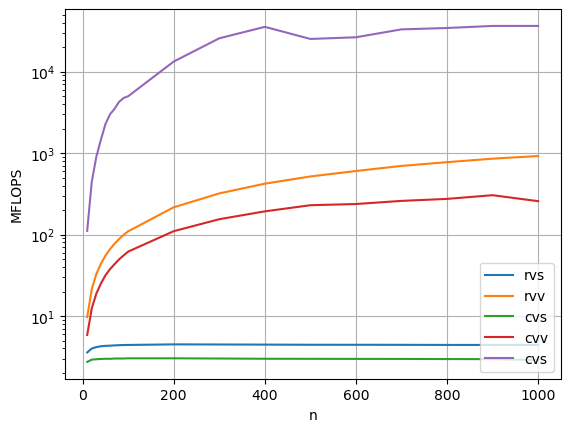

In [14]:
# Code to help you out generating the plot required in Task 8
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(values_of_n, mflops_matvec_row_variant_scalar,label="rvs")
plt.plot(values_of_n, mflops_matvec_row_variant_vectorized,label="rvv")
plt.plot(values_of_n, mflops_matvec_col_variant_scalar,label="cvs")
plt.plot(values_of_n, mflops_matvec_col_variant_vectorized,label="cvv")
plt.plot(values_of_n, mflops_matvec_matmul,label="cvs")

plt.rcParams['legend.loc']='lower right'
plt.xlabel('n')
plt.ylabel('MFLOPS')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

In [15]:
# Write your answers to questions in Task 9 in this cell 
# Use Python code comments (i.e, lines starting with #)

#It's clearly seen that the vectorized functions are faster than the functions that use scalars. This makes sense, since
#the vectorized functions make use of NumPy which results in an increase in performance. The fastest (not surprisingly) is
#the built-in function numpy.matmul(), which comes with NumPy. The slowest function was the scalar version of the column variant.
#This must be because there are slightly more calculations than in the other functions, and it does not fully utilise NumPy. This
#can be similarly said about the scalar row variant function, except it is slightly faster, and this may be because there are
#fewer equations in the function steps. MegaFLOPS seem to evolve over time for faster computations, similarly to a graph function
# square root x. It starts off increasing, but slowly plateaus as more complicated computations are required.

In [16]:
# If you fail to obtain the data required to generate the plot of Task 8, or 
# you cannot make any sense out of the data that you generated, then you can use the 
# data provided below as a fallback, last-chance solution to answer to the questions 
# in Task 9. These data was generated in a Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz`), 
# with Python version `v3.7.6`, and thus might look to some extent different to the
# ones that you obtain in your computers. Note that Task 8 will be marked accordingly 
# to the code that you wrote to generate the data required in order to generate the plot.

values_of_n=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

mflops_matvec_row_variant_scalar=[1.969124151393475, 2.111653689722419, 2.1308634311551846, 
                                  2.152073591185771, 2.0753794436718516, 2.091018550848754, 
                                  1.9748827164187008, 1.8979231682280697, 1.8871331304652257, 
                                  1.8811514834080865, 1.8185234527243108, 1.8622404329078828, 
                                  1.8386648581228635, 1.839629313806703, 1.8231414719766617, 
                                  1.8340406691757491, 1.8671332733816963, 1.809483527291526, 
                                  1.8040121685228072]

mflops_matvec_row_variant_vectorized=[9.418857319021503, 20.113641840030276, 30.76502469502982, 
                                      41.443261012127394, 51.33891922459563, 61.29746287051146, 
                                      70.96409832050709, 83.5705513090586, 93.00082738565675, 
                                      105.43407192109875, 206.98898450461456, 297.95799475893347, 
                                      390.77096622364047, 486.5962201113236, 564.744860979354, 
                                      652.0171276460759, 714.806661111574, 787.7561298807864, 
                                      781.8950630238446]

mflops_matvec_col_variant_scalar=[1.8778285020439505, 1.9118722590990571, 1.9317450073238627, 
                                  1.9212295861212434, 1.9334835253126357, 1.8388728521916735, 
                                  1.8503818952357949, 1.8762072594715478, 1.8520885495275032, 
                                  1.849587134809119, 1.8215095505183878, 1.8486435803897734, 
                                  1.8138802629820499, 1.789176546815382, 1.796023397660986, 
                                  1.782361594696548, 1.7636950403137426, 1.770207212002994, 
                                  1.8471039805274063]

mflops_matvec_col_variant_vectorized=[6.334325735733227, 12.881618333295549, 19.771094978780386, 
                                      26.38522392154612, 32.60855463663772, 39.819044866818864, 
                                      45.855246963433494, 53.13760959226407, 57.82905396335357, 
                                      63.910014847194425, 105.4312931906004, 142.38253439215148, 
                                      181.2025051638151, 203.48778057307294, 217.82168627326715, 
                                      249.08777942411166, 251.71609419715583, 295.7881951080462, 
                                      268.38468660713255]

mflops_matvec_matmul=[95.87732957001717, 384.9857589254826, 812.274957355831, 
                      1386.480074242417, 1876.8762209825545, 2321.0838998826043,
                      2870.533632183864, 3418.8030321181795, 3911.1515947923003,
                      2481.38949972828, 6955.313628038569, 11871.784226720787, 
                      13818.118072980446, 13541.327914659032, 13100.913433320491, 
                      13784.954819770315, 15403.499692420091, 15410.958679015028, 
                      15456.734412311678]